# SI 618: Natural Language Processing

![](resources/nlp/Slide01.png)

# Why learn NLP?
- Natural language = human language
- We use language to learn about the world
- How machines understand human langauge?
- How can we quantify the meaning of language?

## Applications?
- Probabily any service that uses text as information
- Search engine, SNS
    - What's the document about?
    - How do you determine the similarity?
- Virtual assistants: Alexa, Google Assistant, Cortana, etc. 
    - Understand the semantic information from your speech from parsed text
- Biology, genetics
    - Genetic information / DNA sequence as text
    - Draw networks of proteins/molecules from vast amount of scientific papers 

![](resources/nlp/Slide02.png)

![](resources/nlp/Slide03.png)

![](resources/nlp/Slide04.png)

![](resources/nlp/Slide05.png)

![](resources/nlp/Slide06.png)

![](resources/nlp/Slide07.png)

![](resources/nlp/Slide08.png)

![](resources/nlp/Slide09.png)

![](resources/nlp/Slide10.png)

![](resources/nlp/Slide11.png)

![](resources/nlp/Slide12.png)

![](resources/nlp/Slide13.png)

![](resources/nlp/Slide14.png)

![](resources/nlp/Slide15.png)

![](resources/nlp/Slide16.png)

![](resources/nlp/Slide17.png)

![](resources/nlp/Slide18.png)

![](resources/nlp/Slide19.png)

![](resources/nlp/Slide20.png)

![](resources/nlp/Slide21.png)

![](resources/nlp/Slide22.png)

![](resources/nlp/Slide23.png)

![](resources/nlp/Slide24.png)

![](resources/nlp/Slide25.png)

![](resources/nlp/Slide26.png)

![](resources/nlp/Slide27.png)

In [47]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# spaCy?

- Fast, and extensible NLP package for Python
- <https://spacy.io/>

In [48]:
import spacy

In [3]:
# ! python -m spacy download en

In [4]:
# loading up the language model: English
nlp = spacy.load('en')

# 0. Data cleaning

In [82]:
# from Project Gutenberg: Grimms' Fairy Tales
sentences = """
As soon as the time came when he was to declare the secret, he was taken
before the king with the three branches and the golden cup; and the
twelve princesses stood listening behind the door to hear what he would
say. And when the king asked him. ‘Where do my twelve daughters dance at
night?’ he answered, ‘With twelve princes in a castle under ground.’ And
then he told the king all that had happened, and showed him the three
branches and the golden cup which he had brought with him. Then the king
called for the princesses, and asked them whether what the soldier said
was true: and when they saw that they were discovered, and that it was
of no use to deny what had happened, they confessed it all. And the king
asked the soldier which of them he would choose for his wife; and he
answered, ‘I am not very young, so I will have the eldest.’--And they
were married that very day, and the soldier was chosen to be the king’s
heir."""

### Section goal: calculate the frequency of each word
- See which words are more frequent.
- Generate more meaningful summary for the above paragraph.

## 0-1. lowering the case

In [83]:
type(sentences)

str

In [84]:
sentences

'\nAs soon as the time came when he was to declare the secret, he was taken\nbefore the king with the three branches and the golden cup; and the\ntwelve princesses stood listening behind the door to hear what he would\nsay. And when the king asked him. ‘Where do my twelve daughters dance at\nnight?’ he answered, ‘With twelve princes in a castle under ground.’ And\nthen he told the king all that had happened, and showed him the three\nbranches and the golden cup which he had brought with him. Then the king\ncalled for the princesses, and asked them whether what the soldier said\nwas true: and when they saw that they were discovered, and that it was\nof no use to deny what had happened, they confessed it all. And the king\nasked the soldier which of them he would choose for his wife; and he\nanswered, ‘I am not very young, so I will have the eldest.’--And they\nwere married that very day, and the soldier was chosen to be the king’s\nheir.'

In [85]:
sent_low = sentences.lower()

In [86]:
sent_low

'\nas soon as the time came when he was to declare the secret, he was taken\nbefore the king with the three branches and the golden cup; and the\ntwelve princesses stood listening behind the door to hear what he would\nsay. and when the king asked him. ‘where do my twelve daughters dance at\nnight?’ he answered, ‘with twelve princes in a castle under ground.’ and\nthen he told the king all that had happened, and showed him the three\nbranches and the golden cup which he had brought with him. then the king\ncalled for the princesses, and asked them whether what the soldier said\nwas true: and when they saw that they were discovered, and that it was\nof no use to deny what had happened, they confessed it all. and the king\nasked the soldier which of them he would choose for his wife; and he\nanswered, ‘i am not very young, so i will have the eldest.’--and they\nwere married that very day, and the soldier was chosen to be the king’s\nheir.'

## 0-2. remove punctuations and special characters

#### Exclude special characters one by one

In [87]:
# from https://www.programiz.com/python-programming/examples/remove-punctuation
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~''' # list of special characters you want to exclude
sent_low_pnct = ""
for char in sent_low:
    if char not in punctuations:
        sent_low_pnct = sent_low_pnct + char

sent_low_pnct

'\nas soon as the time came when he was to declare the secret he was taken\nbefore the king with the three branches and the golden cup and the\ntwelve princesses stood listening behind the door to hear what he would\nsay and when the king asked him ‘where do my twelve daughters dance at\nnight’ he answered ‘with twelve princes in a castle under ground’ and\nthen he told the king all that had happened and showed him the three\nbranches and the golden cup which he had brought with him then the king\ncalled for the princesses and asked them whether what the soldier said\nwas true and when they saw that they were discovered and that it was\nof no use to deny what had happened they confessed it all and the king\nasked the soldier which of them he would choose for his wife and he\nanswered ‘i am not very young so i will have the eldest’and they\nwere married that very day and the soldier was chosen to be the king’s\nheir'

#### Alternatively, we can use regular expression to remove punctuations
- So we don't have to list up all possible special characters that we want to remove
- https://docs.python.org/3.4/library/re.html
- https://en.wikipedia.org/wiki/Regular_expression

In [88]:
import re
sent_low_pnct2 = re.sub(r'[^\w\s]', '', sent_low)

In [89]:
sent_low_pnct2

'\nas soon as the time came when he was to declare the secret he was taken\nbefore the king with the three branches and the golden cup and the\ntwelve princesses stood listening behind the door to hear what he would\nsay and when the king asked him where do my twelve daughters dance at\nnight he answered with twelve princes in a castle under ground and\nthen he told the king all that had happened and showed him the three\nbranches and the golden cup which he had brought with him then the king\ncalled for the princesses and asked them whether what the soldier said\nwas true and when they saw that they were discovered and that it was\nof no use to deny what had happened they confessed it all and the king\nasked the soldier which of them he would choose for his wife and he\nanswered i am not very young so i will have the eldestand they\nwere married that very day and the soldier was chosen to be the kings\nheir'

- However, special character ```\n``` (linebreak) still exists in both cases. Let's remove these additionally.

In [90]:
import os
os.linesep

'\n'

In [91]:
sent_low_pnct = sent_low_pnct.replace(os.linesep, " ")
sent_low_pnct

' as soon as the time came when he was to declare the secret he was taken before the king with the three branches and the golden cup and the twelve princesses stood listening behind the door to hear what he would say and when the king asked him ‘where do my twelve daughters dance at night’ he answered ‘with twelve princes in a castle under ground’ and then he told the king all that had happened and showed him the three branches and the golden cup which he had brought with him then the king called for the princesses and asked them whether what the soldier said was true and when they saw that they were discovered and that it was of no use to deny what had happened they confessed it all and the king asked the soldier which of them he would choose for his wife and he answered ‘i am not very young so i will have the eldest’and they were married that very day and the soldier was chosen to be the king’s heir'

### $\rightarrow$ 3 possible ways to replace characters!

### <font color='red'> Q1. How would you remove numbers from the paragraph? </font>

In [92]:
# put your code here

In [93]:
re.sub(r'[0-9]', '', sent_low_pnct)

' as soon as the time came when he was to declare the secret he was taken before the king with the three branches and the golden cup and the twelve princesses stood listening behind the door to hear what he would say and when the king asked him ‘where do my twelve daughters dance at night’ he answered ‘with twelve princes in a castle under ground’ and then he told the king all that had happened and showed him the three branches and the golden cup which he had brought with him then the king called for the princesses and asked them whether what the soldier said was true and when they saw that they were discovered and that it was of no use to deny what had happened they confessed it all and the king asked the soldier which of them he would choose for his wife and he answered ‘i am not very young so i will have the eldest’and they were married that very day and the soldier was chosen to be the king’s heir'

In [94]:
numbers = "0123456789"
sent_nonum = ""
for char in sent_low_pnct:
    if char not in numbers:
        sent_nonum = sent_nonum + char

sent_nonum

' as soon as the time came when he was to declare the secret he was taken before the king with the three branches and the golden cup and the twelve princesses stood listening behind the door to hear what he would say and when the king asked him ‘where do my twelve daughters dance at night’ he answered ‘with twelve princes in a castle under ground’ and then he told the king all that had happened and showed him the three branches and the golden cup which he had brought with him then the king called for the princesses and asked them whether what the soldier said was true and when they saw that they were discovered and that it was of no use to deny what had happened they confessed it all and the king asked the soldier which of them he would choose for his wife and he answered ‘i am not very young so i will have the eldest’and they were married that very day and the soldier was chosen to be the king’s heir'

## 0-3. Remove stop words

- Stop words usually refers to the most common words in a language
    - No single universal stopwords
    - Often stopwords are removed to improve the performance of NLP models
    - https://en.wikipedia.org/wiki/Stop_words
    - https://en.wikipedia.org/wiki/Most_common_words_in_English

#### Import the list of stop words from ```spaCy```

In [95]:
from spacy.lang.en.stop_words import STOP_WORDS

In [96]:
import numpy as np

In [97]:
np.array(STOP_WORDS)

array({'such', 'would', 'own', 'some', 'move', 'thereafter', 'whereas', 'are', 'done', 'toward', 'please', 'all', 'had', 'which', 'never', 'always', 'across', 'then', 'throughout', 'up', 'besides', 'i', 'formerly', 'am', 'became', 'everyone', 'back', 'during', 'him', 'have', 'over', 'between', 'both', 'herself', 'whatever', 'via', 'except', 'enough', 'name', 'yet', 'already', 'this', 'may', 'take', 'his', 'at', 'seemed', 'third', 'nor', 'latter', 'very', 'ever', 'eight', 'hers', 'something', 'upon', 'who', 'now', 'somewhere', 'twenty', 'somehow', 'been', 'here', 'however', 'whenever', 'whereupon', 'hereupon', 'my', 'nine', 'against', 'herein', 'becoming', 'down', 'else', 'once', 'into', 'myself', 'whither', 'ours', 'together', 'cannot', 'were', 'mostly', 'can', 'beyond', 'least', 'as', 'further', 'nevertheless', 'not', 'several', 'among', 'about', 'again', 'few', 'should', 'using', 'give', 'our', 'there', 'whose', 'that', 'call', 'anyone', 'most', 'become', 'keep', 'anyhow', 'each', 'h

#### Goal: We are going to count the frequency of each word from the paragraph, to see which words can be used to represent the paragraph's content. 

#### What if we do not remove stopwords?

In [98]:
from collections import Counter

- Note that our paragraph is stored as a single string object...

In [99]:
sent_low_pnct

' as soon as the time came when he was to declare the secret he was taken before the king with the three branches and the golden cup and the twelve princesses stood listening behind the door to hear what he would say and when the king asked him ‘where do my twelve daughters dance at night’ he answered ‘with twelve princes in a castle under ground’ and then he told the king all that had happened and showed him the three branches and the golden cup which he had brought with him then the king called for the princesses and asked them whether what the soldier said was true and when they saw that they were discovered and that it was of no use to deny what had happened they confessed it all and the king asked the soldier which of them he would choose for his wife and he answered ‘i am not very young so i will have the eldest’and they were married that very day and the soldier was chosen to be the king’s heir'

- Split the paragraph into a list of words

In [100]:
words = sent_low_pnct.split()

- Count the words from the list
- Words that can occur in any kind of paragraphs...?

In [101]:
Counter(words).most_common(10)

[('the', 19),
 ('and', 12),
 ('he', 8),
 ('was', 5),
 ('king', 5),
 ('to', 4),
 ('that', 4),
 ('they', 4),
 ('when', 3),
 ('twelve', 3)]

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

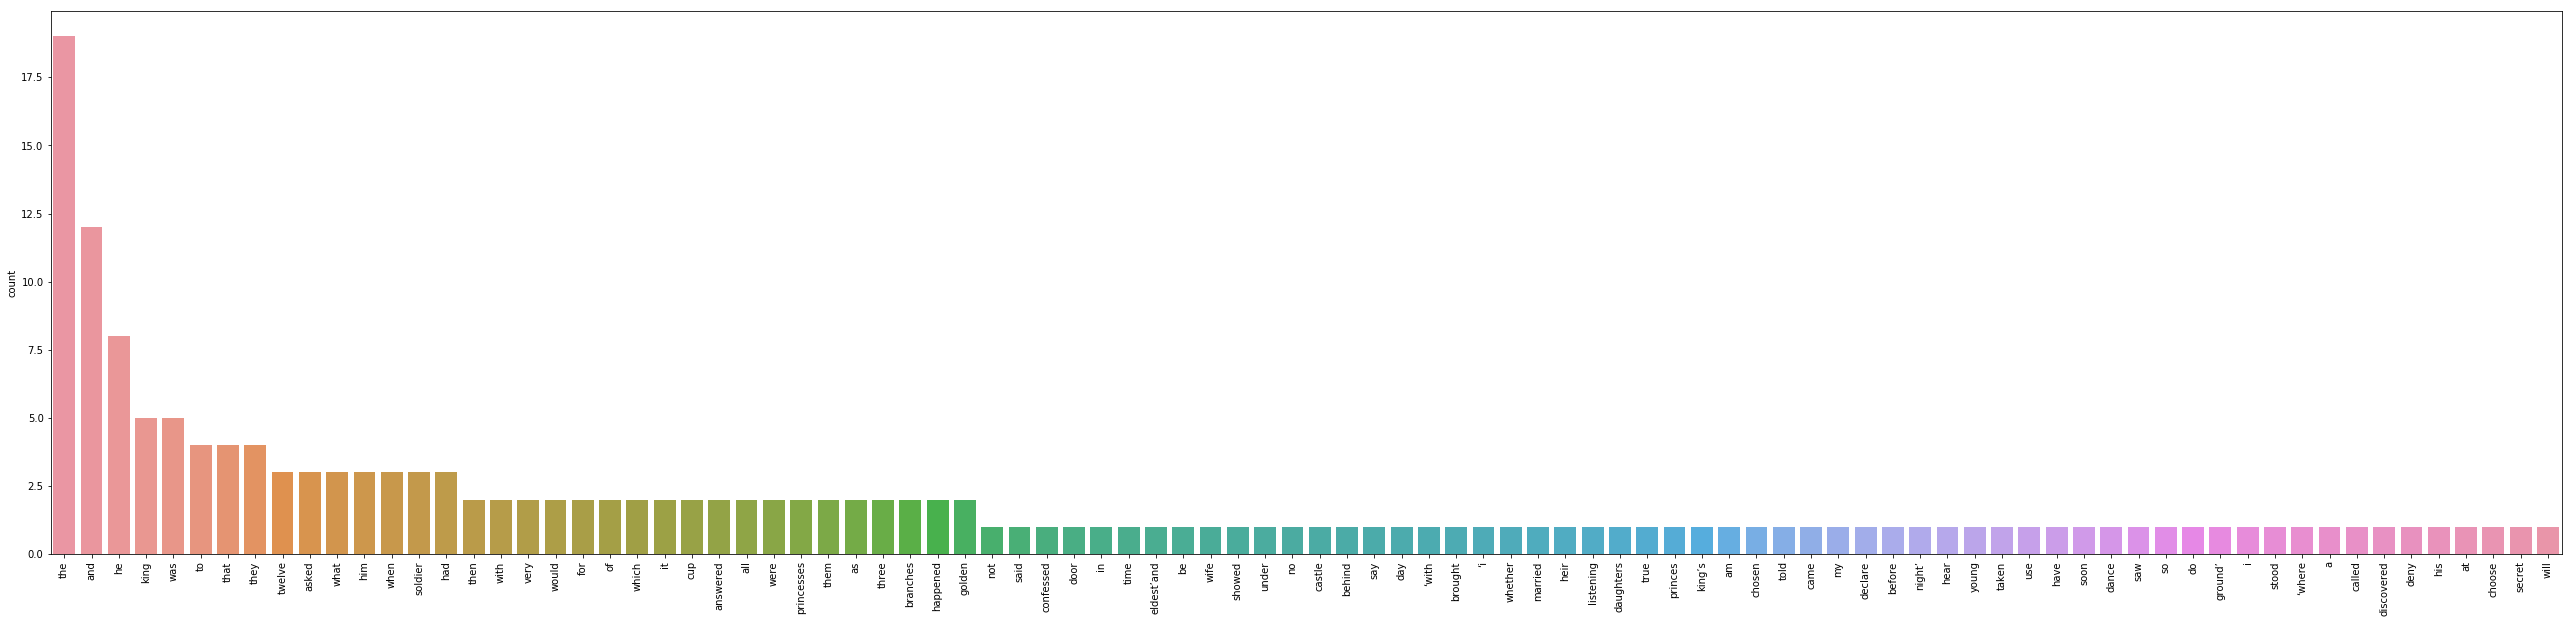

In [103]:
plt.figure(figsize=(45,10))
sns.countplot(words, order=pd.Series(words).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

(double click the plot to enlarge)

#### When we removed stopwords:

In [104]:
# split sentence into words
words_nostop = list()
for word in words:
    if word not in STOP_WORDS:
        words_nostop.append(word)
# words_nostop = [word for word in words if word not in STOP_WORDS]

- More comprehensible, and unique list or words!

In [105]:
Counter(words_nostop).most_common(10)

[('king', 5),
 ('asked', 3),
 ('soldier', 3),
 ('branches', 2),
 ('golden', 2),
 ('cup', 2),
 ('princesses', 2),
 ('answered', 2),
 ('happened', 2),
 ('soon', 1)]

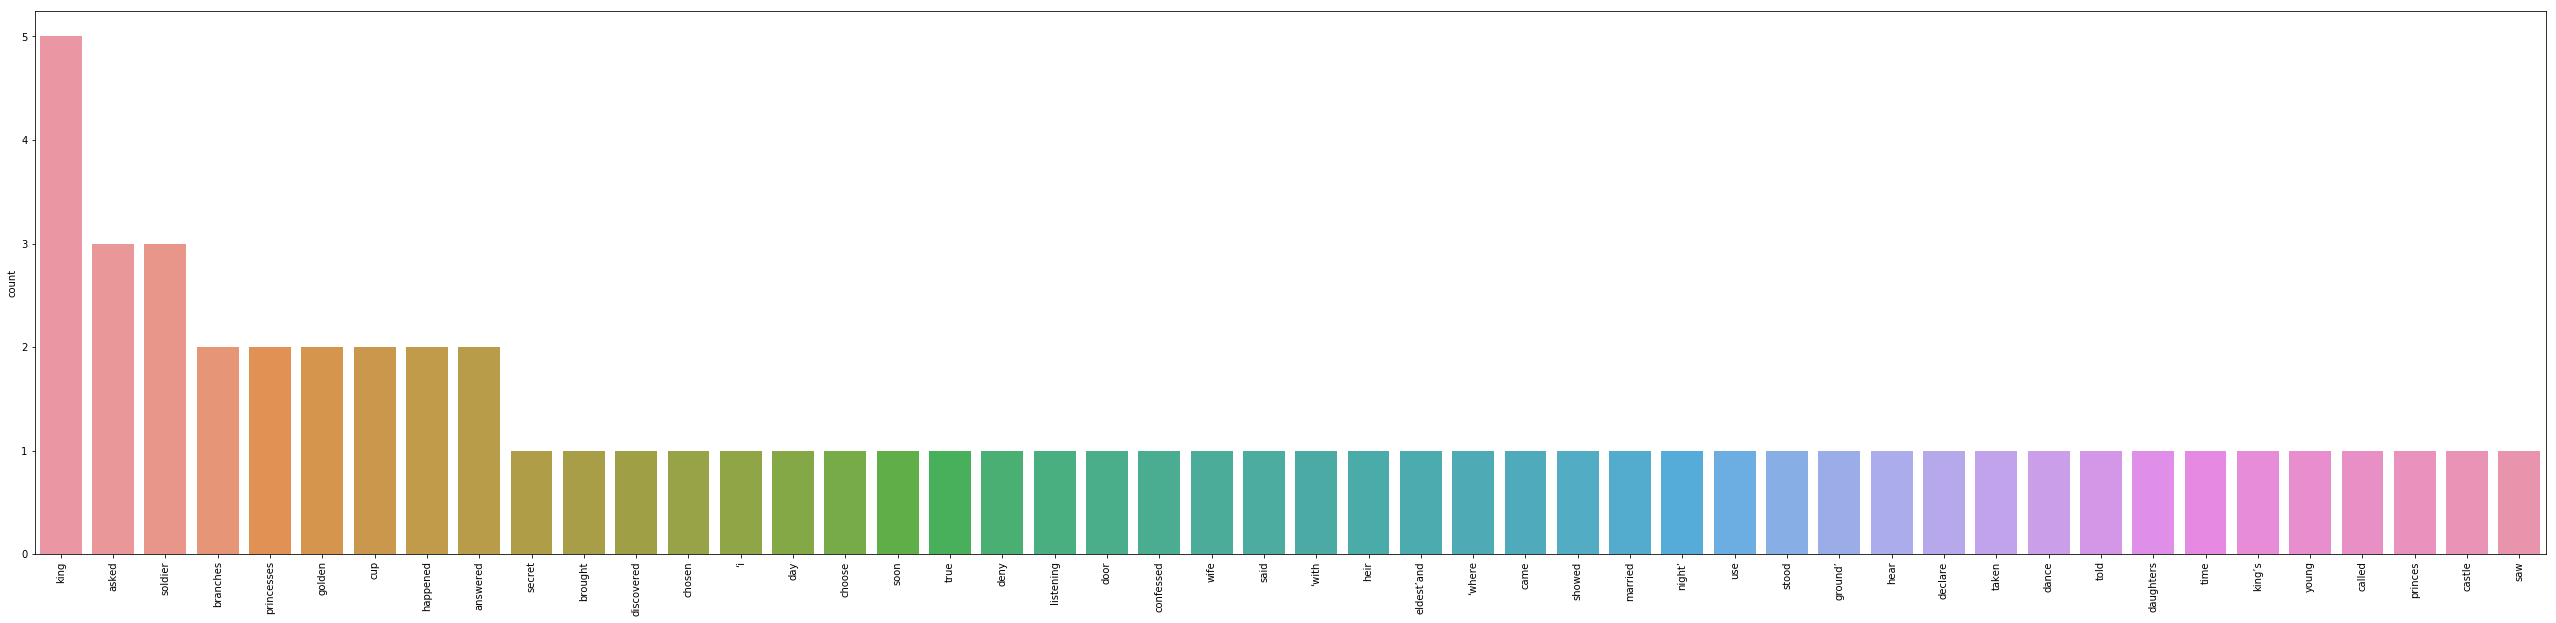

In [106]:
plt.figure(figsize=(45,10))
sns.countplot(words_nostop, order=pd.Series(words_nostop).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

(double click the plot to enlarge)

### <font color='red'> Q2. Based on the word frequency results, what was the paragraph about? </font>

(type in your response here)

# 1. Extracting linguistic features from spaCy

## 1-1. Tokenize
- Token: a semantic unit for analysis
    - (Loosely) equal term for word
        - ```sent_low_pnct.split()```
    - Tricky cases
        - aren't $\rightarrow$ ![](https://nlp.stanford.edu/IR-book/html/htmledition/img88.png) ![](https://nlp.stanford.edu/IR-book/html/htmledition/img89.png) ? ![](https://nlp.stanford.edu/IR-book/html/htmledition/img86.png) ?
        - O'Neil $\rightarrow$ ![](https://nlp.stanford.edu/IR-book/html/htmledition/img83.png) ? ![](https://nlp.stanford.edu/IR-book/html/htmledition/img84.png) ![](https://nlp.stanford.edu/IR-book/html/htmledition/img81.png) ?
        - https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html
- In ```spaCy```:
    - Many token types, like word, puntuation symbol, whitespace, etc.

### Let's disect the sentence!

- initiating the ```spaCy``` object 

In [107]:
# examples partially taken from https://nlpforhackers.io/complete-guide-to-spacy/
import spacy
nlp = spacy.load('en')

- Our sentence: "Hello World!"
    - Pass the sentence string to the ```spaCy``` object ```nlp```

In [108]:
doc = nlp("Hello World!")

- The sentence is considered as a short document.

In [109]:
print(type(doc), doc)

<class 'spacy.tokens.doc.Doc'> Hello World!


- As importing the sentence string above, ```spaCy``` splited the sentence into tokens (tokenization!)

In [110]:
for i,token in enumerate(doc):
    print(i, token)

0 Hello
1 World
2 !


- With index information (location from the sentence) of each token

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11|
|---|---|---|---|---|---|---|---|---|---|---|---|
| H | e | l | l | o | _ | W | o | r | l | d | ! |

In [111]:
for i, token in enumerate(doc):
    print(i, token.text, token.idx) 


0 Hello 0
1 World 6
2 ! 11


- And many more!
    - https://spacy.io/api/token#attributes

In [ ]:
doc = nlp(sentences)

print("text\tidx\tlemma\tlower\tpunct\tspace\tshape\tPOS")
for token in doc:
    if token.is_space:
        print("SPACE")
    else:
        print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
            token.text,
            token.idx,
            token.lemma_,
            token.lower_,
            token.is_punct,
            token.is_space,
            token.shape_,
            token.pos_
    ))


## 1-2. Sentence detection

- For the document with multiple sentences, we would need to separate between each sentences.
- In ```spaCy```, the job is more convinient (and would cause less mistatkes) than using regular expression

- in ```spaCy```!

In [114]:
# same document, but initiate as the spaCy object...
doc = nlp(sentences)

- Sentences are stored as a generator object
    - Instead of storing sentences as a list, each sentence is stored as a item in the generator object 
    - Iteratable (i.e., can be used in a for loop)
    - More efficient memory use
    - https://wiki.python.org/moin/Generators

In [115]:
doc.sents

- Printing sentences with the index number

In [ ]:
for i, sent in enumerate(doc.sents):
    print(i, sent)

## 1-3. POS tagging

- I want to find words with particular part-of-speech!
- Different part-of-speech words carry different information
    - e.g., noun (subject), verb (action term), adjective (quality of the object) 
- https://spacy.io/api/annotation#pos-tagging

- Yelp review!

In [148]:
# from https://www.yelp.com/biz/ajishin-novi?hrid=juA4Zn2TX7845vNFn4syBQ&utm_campaign=www_review_share_popup&utm_medium=copy_link&utm_source=(direct)
doc = nlp("""One of the best Japanese restaurants in Novi. Simple food, great taste, amazingly price. I visit this place a least twice month.""")

- multiple sentences exist in a document

In [151]:
for i, sent in enumerate(doc.sents):
    print(i, sent)

0 One of the best Japanese restaurants in Novi.
1 Simple food, great taste, amazingly price.
2 I visit this place a least twice month.


- Question: which words are adjective (ADJ)?

In [152]:
for i, sent in enumerate(doc.sents):
    print("__sentence__:", i)
    print("_token_ \t _POS_")
    for token in sent:
        print(token.text, "\t", token.pos_)

__sentence__: 0
_token_ 	 _POS_
One 	 NUM
of 	 ADP
the 	 DET
best 	 ADJ
Japanese 	 ADJ
restaurants 	 NOUN
in 	 ADP
Novi 	 PROPN
. 	 PUNCT
__sentence__: 1
_token_ 	 _POS_
Simple 	 ADJ
food 	 NOUN
, 	 PUNCT
great 	 ADJ
taste 	 NOUN
, 	 PUNCT
amazingly 	 ADV
price 	 NOUN
. 	 PUNCT
__sentence__: 2
_token_ 	 _POS_
I 	 PRON
visit 	 VERB
this 	 DET
place 	 NOUN
a 	 DET
least 	 ADJ
twice 	 ADJ
month 	 NOUN
. 	 PUNCT


## Named Entity Recognition

In [155]:
doc = nlp("""Democrat Stacey Abrams was trailing in her bid to become the nation’s first female African-American governor, but her campaign said voting problems as well as uncounted absentee and provisional ballots could force a runoff.""")

pprint([(X.text, X.label_) for X in doc.ents])

for i, sent in enumerate(doc.sents):
    print("__sentence__:", i)
    print("_token_ \t _POS_")
    for token in sent:
        print(token.text, "\t", token.pos_)



[('Democrat', 'NORP'),
 ('Stacey Abrams', 'PERSON'),
 ('first', 'ORDINAL'),
 ('African-American', 'NORP')]
__sentence__: 0
_token_ 	 _POS_
Democrat 	 PROPN
Stacey 	 PROPN
Abrams 	 PROPN
was 	 VERB
trailing 	 VERB
in 	 ADP
her 	 ADJ
bid 	 NOUN
to 	 PART
become 	 VERB
the 	 DET
nation 	 NOUN
’s 	 PART
first 	 ADJ
female 	 ADJ
African 	 ADJ
- 	 PUNCT
American 	 ADJ
governor 	 NOUN
, 	 PUNCT
but 	 CCONJ
her 	 ADJ
campaign 	 NOUN
said 	 VERB
voting 	 NOUN
problems 	 NOUN
as 	 ADV
well 	 ADV
as 	 ADP
uncounted 	 ADJ
absentee 	 NOUN
and 	 CCONJ
provisional 	 ADJ
ballots 	 NOUN
could 	 VERB
force 	 VERB
a 	 DET
runoff 	 NOUN
. 	 PUNCT


In [156]:
url='https://www.nytimes.com/2018/11/07/us/politics/democrats-republicans-house.html'

In [157]:
from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string(url)
article = nlp(ny_bb)
len(article.ents)

586

In [158]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'CARDINAL': 33,
         'DATE': 65,
         'EVENT': 1,
         'FAC': 2,
         'GPE': 86,
         'LAW': 3,
         'LOC': 4,
         'MONEY': 2,
         'NORP': 92,
         'ORDINAL': 5,
         'ORG': 102,
         'PERSON': 184,
         'PRODUCT': 2,
         'TIME': 4,
         'WORK_OF_ART': 1})

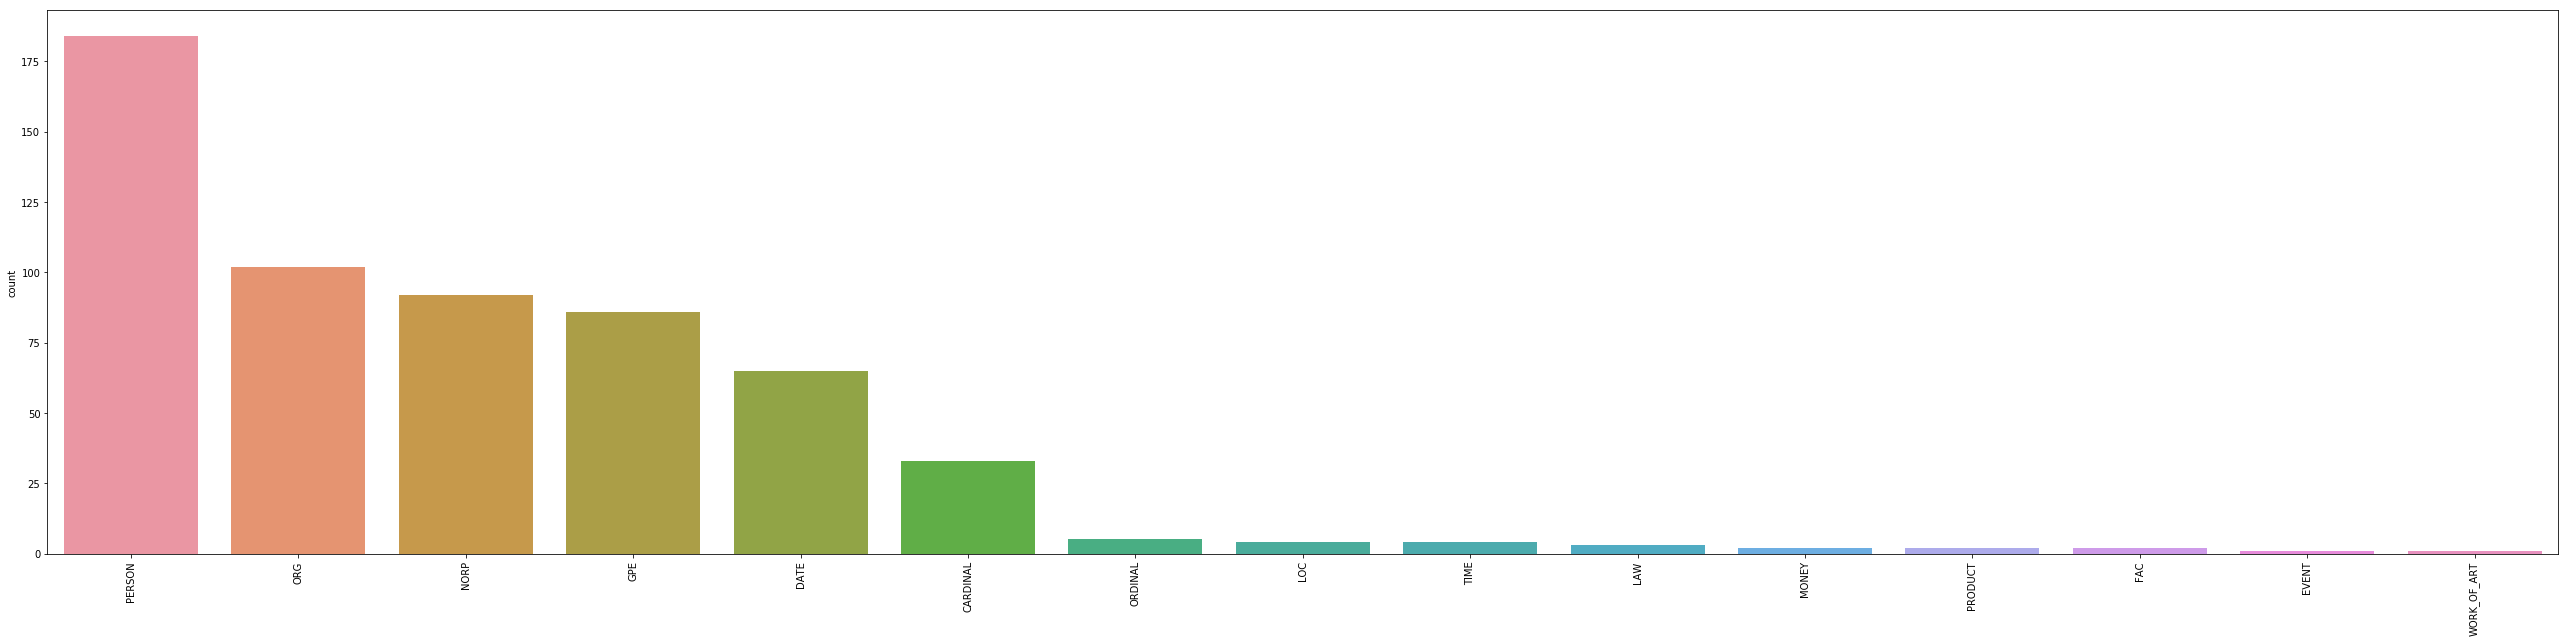

In [159]:
plt.figure(figsize=(45,10))
sns.countplot(labels, order=pd.Series(labels).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

## 1-4. Gramatical dependency
- Words are gramatically related in a sentence.
- Conveys much semantic information about the sentential context.

In [160]:
spacy.displacy.render(article, style='dep', jupyter=True)

### Q3. <font color='red'> Repeat the above steps, starting with scraping and ending with the dependency graph, on a URL of your choice from any news site (we recommend nytimes.com, but you are free to choose any one you want.  How do the results compare to the example above?</font>


In [141]:
# your code here

(type in your response here)